In [91]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
from sklearn.datasets import load_wine
wine = load_wine()


In [100]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=None)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.112, random_state=None)

In [101]:
n_val = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valid_score1 = [] # m=sqrt(p)를 적용한 random forest 모델
valid_score2 = [] # m=log2(p)를 적용한 random forest 모델
valid_score3 = [] # m=p를 적용한 random forest(bagging) 모델

test_score1 = []
test_score2 = []
test_score3 = []

for n in n_val:
    forest1 = RandomForestClassifier(n_estimators=n, max_features='sqrt', max_depth=3)
    forest1.fit(X_subtrain, y_subtrain)
    
    forest2 = RandomForestClassifier(n_estimators=n, max_features='log2', max_depth=3)
    forest2.fit(X_subtrain, y_subtrain)
    
    forest3 = RandomForestClassifier(n_estimators=n, max_features= None, max_depth=3)
    forest3.fit(X_subtrain, y_subtrain)
    
    valid_score1.append(forest1.score(X_val, y_val))
    valid_score2.append(forest2.score(X_val, y_val))
    valid_score3.append(forest3.score(X_val, y_val))
    
    forest1.fit(X_train, y_train)
    forest2.fit(X_train, y_train)
    forest3.fit(X_train, y_train)
    
    test_score1.append(forest1.score(X_test, y_test))
    test_score2.append(forest2.score(X_test, y_test))
    test_score3.append(forest3.score(X_test, y_test))


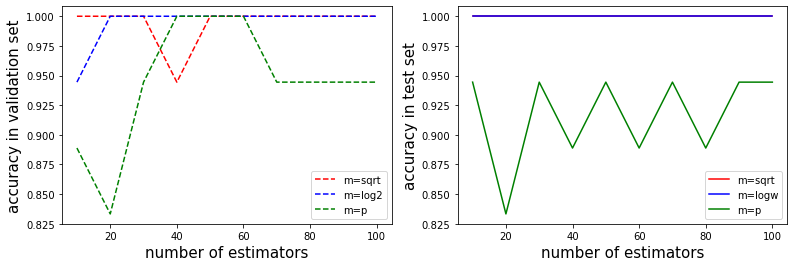

In [102]:
# 빨간선은 Nanhattan distance 사용, 파란선은 Euclidean distance 사용
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(n_val, valid_score1, c='r', label='m=sqrt', ls='--')
plt.plot(n_val, valid_score2, c='b', label='m=log2', ls='--')
plt.plot(n_val, valid_score3, c='g', label='m=p', ls='--')
plt.xlabel("number of estimators", size= 15)
plt.ylabel("accuracy in validation set", size= 15)
plt.legend()

plt.subplot(122)
plt.plot(n_val, test_score1, c='r', label='m=sqrt')
plt.plot(n_val, test_score2, c='b', label='m=logw')
plt.plot(n_val, test_score3, c='g', label='m=p')
plt.legend()
plt.xlabel("number of estimators", size= 15)
plt.ylabel("accuracy in test set", size= 15)
plt.show()

In [121]:
# wine data에서 중요도가 높았던 두 feature를 뽑아 새로운 데이터로 사용
# 뽑은 feature는 color_intensity와 flavanoids

X= wine.data[:, [6, 12]]
y= wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=None)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning

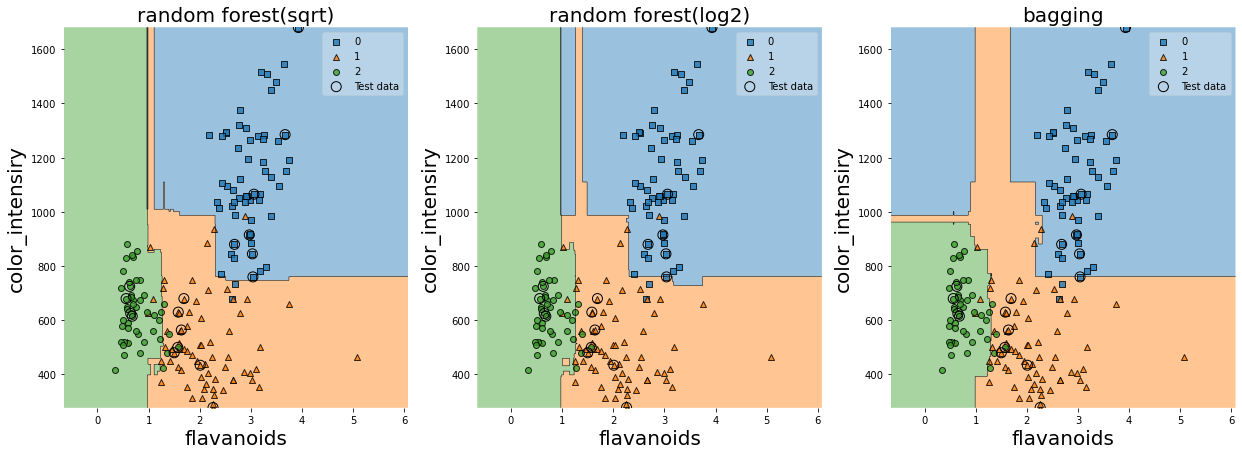

In [122]:
# forest 모델과 bagging 모델의 시각화 
# mlxtend라는 시각화해주는 api사용
forest_sqrt= RandomForestClassifier(n_estimators=30, max_features='sqrt', max_depth=3)
forest_sqrt.fit(X_train, y_train)

forest_log2= RandomForestClassifier(n_estimators=30, max_features='log2', max_depth=3)
forest_log2.fit(X_train, y_train)

bagging = RandomForestClassifier(n_estimators=30, max_features=None, max_depth=3)
bagging.fit(X_train, y_train)

scatter_highlight_kwargs = {'label': 'Test data', 
                            'alpha': 1.0,
                           's': 100}

plt.figure(figsize=(21, 7))
plt.subplot(131)
plt.title("random forest(sqrt)", size= 20)
plt.xlabel('flavanoids', size= 20)
plt.ylabel('color_intensiry', size= 20)
plot_decision_regions(X, y, clf=forest_sqrt,
                     X_highlight=X_test,
                     scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.subplot(132)
plt.title("random forest(log2)", size= 20)
plt.xlabel('flavanoids', size= 20)
plt.ylabel('color_intensiry', size= 20)
plot_decision_regions(X, y, clf=forest_log2,
                     X_highlight=X_test,
                     scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.subplot(133)
plt.title("bagging", size= 20)
plt.xlabel('flavanoids', size= 20)
plt.ylabel('color_intensiry', size= 20)
plot_decision_regions(X, y, clf=bagging,
                     X_highlight=X_test,
                     scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.show()

In [123]:
y_pred_forest_sqrt = forest_sqrt.predict(X_test)
y_pred_forest_log2 = forest_log2.predict(X_test)
y_pred_bagging = bagging.predict(X_test)

print("************************random forest(m=sqrt))*******************")
print(classification_report(y_test, y_pred_forest_sqrt))

print("************************random forest(m=log2)********************")
print(classification_report(y_test, y_pred_forest_log2))

print("************************bagging(m=n_features)********************")
print(classification_report(y_test, y_pred_bagging))

************************random forest(m=sqrt))*******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.95      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18

************************random forest(m=log2)********************
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         6
           2       1.00      0.80      0.89         5

    accuracy                           0.89        18
   macro avg       0.92      0.89      0.89        18
weighted avg       0.92      0.89      0.89        18

************************bagging(m=n_features)********************
              precision    recall  f1-sc